#### Generate yearly demand profile in grid x
x='2' for exemple

In [1]:
import pickle
import pandas as pd
import numpy as np
import geopandas as gpd 
import os
import tqdm
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

grid_id = '2'
# read folder dictionary
with open('municipality_profiles/dict_folder.json') as f:
    folders = json.load(f)
# read the profile
with open('municipality_profiles/commercial_profile_k-means.pkl', 'rb') as f:
    commercial_profile_kmean = pickle.load(f)
residential_profile = pd.read_csv('municipality_profiles/residential_profiles_24h.csv', index_col=0)
commercial_profile = pd.read_csv('municipality_profiles/commercial_profiles_24h.csv', index_col=0)
commercial_profile_day=commercial_profile_kmean[grid_id]['profile'].reshape(-1, 24)
counts = commercial_profile_kmean[grid_id]['counts']
repeated_profiles = [profile for profile, count in zip(commercial_profile_day, counts) for _ in range(count)]
np.random.shuffle(repeated_profiles)
commercial_profile_year = np.concatenate(repeated_profiles)
residential_profile_day = np.array(residential_profile[grid_id])
residential_profile_year = np.tile(residential_profile_day, 365)

path = 'LV/'+folders[grid_id]+'/'
grid_ids = list(set([str(f.split('.')[0][:-6]) for f in os.listdir(path) if f.startswith(grid_id+'-')])) 
print("Processing grid {} in municipality {}".format(grid_id, folders[grid_id]))
for n in tqdm.tqdm(range(len(grid_ids))):
    i = grid_ids[n]
    node_id = i+"_nodes"
    nodes = gpd.read_file('LV/'+folders[grid_id]+'/'+node_id)
    nodes['profile'] = {}
    for iter, row in nodes.iterrows():
        combined_profile = row['res_percentage'] * residential_profile_year + row['com_percentage'] * commercial_profile_year
        nodes.at[iter, 'profile'] = combined_profile
    # create foler LV_with_profiles if it does not exist
    if not os.path.exists('LV_with_profiles/'+folders[grid_id]):
        os.makedirs('LV_with_profiles/'+folders[grid_id])
    save_path = 'LV_with_profiles/'+folders[grid_id]+'/'+i+'_nodes'
    nodes.to_pickle(save_path)
    

Processing grid 2 in municipality Midlands-Urban


100%|██████████| 29/29 [00:01<00:00, 16.25it/s]


In [2]:
i = 16
nodes_test = pd.read_pickle('LV_with_profiles/'+folders[grid_id]+'/'+grid_ids[i]+'_nodes')
nodes_test.shape

(82, 13)

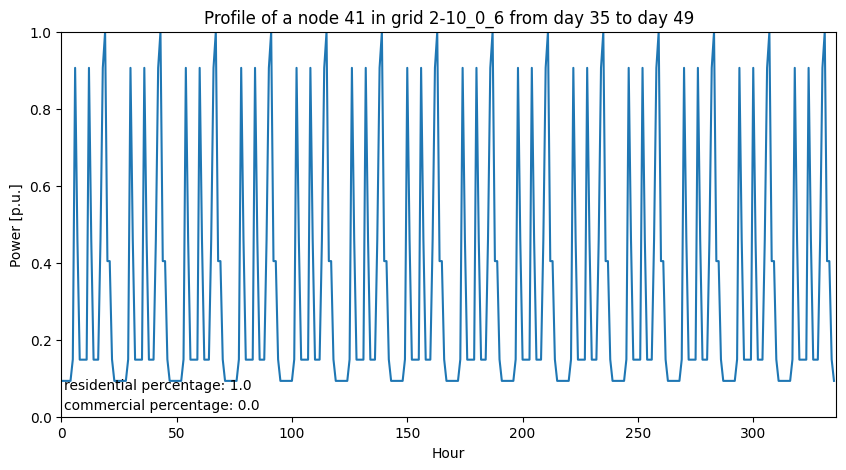

In [16]:
start_day = 35 #day
intervals = 14 #day
node = 41
fig=plt.figure(figsize=(10, 5))
plt.plot(nodes_test['profile'][node][start_day*24:(start_day+intervals)*24])
plt.xlabel('Hour')
plt.ylabel('Power [p.u.]')  
plt.title('Profile of a node {} in grid {} from day {} to day {}'.format(node, grid_ids[i], start_day, start_day+intervals))
plt.ylim(0, 1)
plt.xlim(0, 24*intervals)
plt.text(1, 0.07, 'residential percentage: {}'.format(round(nodes_test['res_percentage'][node], 3)), fontsize=10)
plt.text(1, 0.02, 'commercial percentage: {}'.format(round(nodes_test['com_percentage'][node], 3)), fontsize=10)
plt.show()

#### Generate daily demand profile in grid x
x='2' for exemple

In [17]:
import pickle
import pandas as pd
import numpy as np
import geopandas as gpd 
import os
import tqdm
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

grid_id = '2'
# read folder dictionary
with open('municipality_profiles/dict_folder.json') as f:
    folders = json.load(f)
# read the profile
residential_profile = pd.read_csv('municipality_profiles/residential_profiles_24h.csv', index_col=0)
commercial_profile = pd.read_csv('municipality_profiles/commercial_profiles_24h.csv', index_col=0)
residential_day = np.array(residential_profile[grid_id])
commercial_day = np.array(commercial_profile[grid_id])
path = 'LV/'+folders[grid_id]+'/'
grid_ids = list(set([str(f.split('.')[0][:-6]) for f in os.listdir(path) if f.startswith(grid_id+'-')]))
#print "processing grid x in municipality y"
print("Processing grid {} in municipality {}".format(grid_id, folders[grid_id]))
for n in tqdm.tqdm(range(len(grid_ids))):
    i = grid_ids[n]
    node_id = i+"_nodes"
    nodes = gpd.read_file('LV/'+folders[grid_id]+'/'+node_id)
    nodes['profile'] = {}
    for iter, row in nodes.iterrows():
        combined_profile = row['res_percentage'] * residential_day + row['com_percentage'] * commercial_day
        nodes.at[iter, 'profile'] = combined_profile
    # create foler LV_with_profiles if it does not exist
    if not os.path.exists('LV_with_profiles/'+folders[grid_id]):
        os.makedirs('LV_with_profiles/'+folders[grid_id])
    save_path = 'LV_with_profiles/'+folders[grid_id]+'/'+i+'_nodes'
    nodes.to_pickle(save_path)

Processing grid 2 in municipality Midlands-Urban


100%|██████████| 29/29 [00:01<00:00, 25.91it/s]


In [21]:
i = 15
nodes_test = pd.read_pickle('LV_with_profiles/'+folders[grid_id]+'/'+grid_ids[i]+'_nodes')
nodes_test.shape

(120, 13)

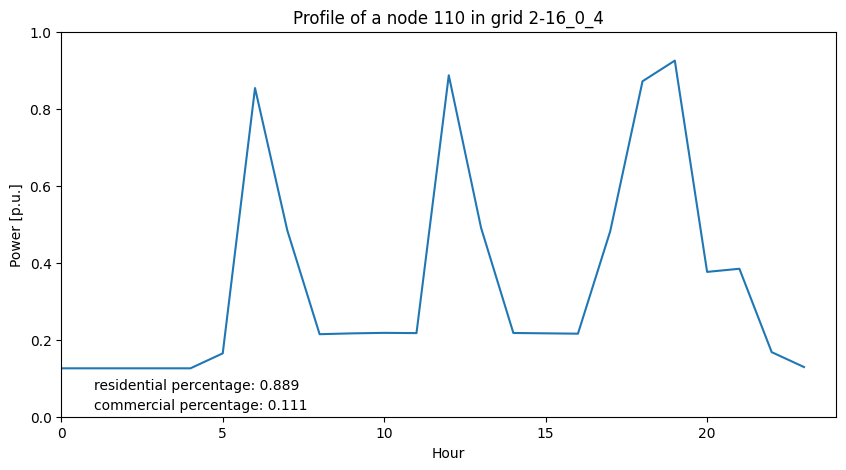

In [22]:
node = 110
fig=plt.figure(figsize=(10, 5))
plt.plot(nodes_test['profile'][node])
plt.xlabel('Hour')
plt.ylabel('Power [p.u.]')
plt.title('Profile of a node {} in grid {}'.format(node, grid_ids[2]))
# print the residential and commercial percentage with 3 decimal in the figure
plt.ylim(0, 1)
plt.xlim(0, 24)
plt.text(1, 0.07, 'residential percentage: {}'.format(round(nodes_test['res_percentage'][node], 3)), fontsize=10)
plt.text(1, 0.02, 'commercial percentage: {}'.format(round(nodes_test['com_percentage'][node], 3)), fontsize=10)
plt.show()

```math
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
```